# Analyze the wines dataset using Agglomerative Clustering

## Description -  
This data is about red wines. The input include objective tests (e.g. PH values) and the output is based on sensory data (median of atleast 3 evaluations made by wine experts), Each expert graded the wine quality between 0 (ver bad) to 10 (very excellent). We have to ask K-means clustering to understand if 10 clusters exist and what their chaaracterstics are:

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("winequality-red (1).csv") 

In [8]:
wine_data.shape

(1599, 12)

In [9]:
wine_data_attr = wine_data.iloc[:,0:12]
wine_data_attr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH', 'sulphates','alcohol','quality']


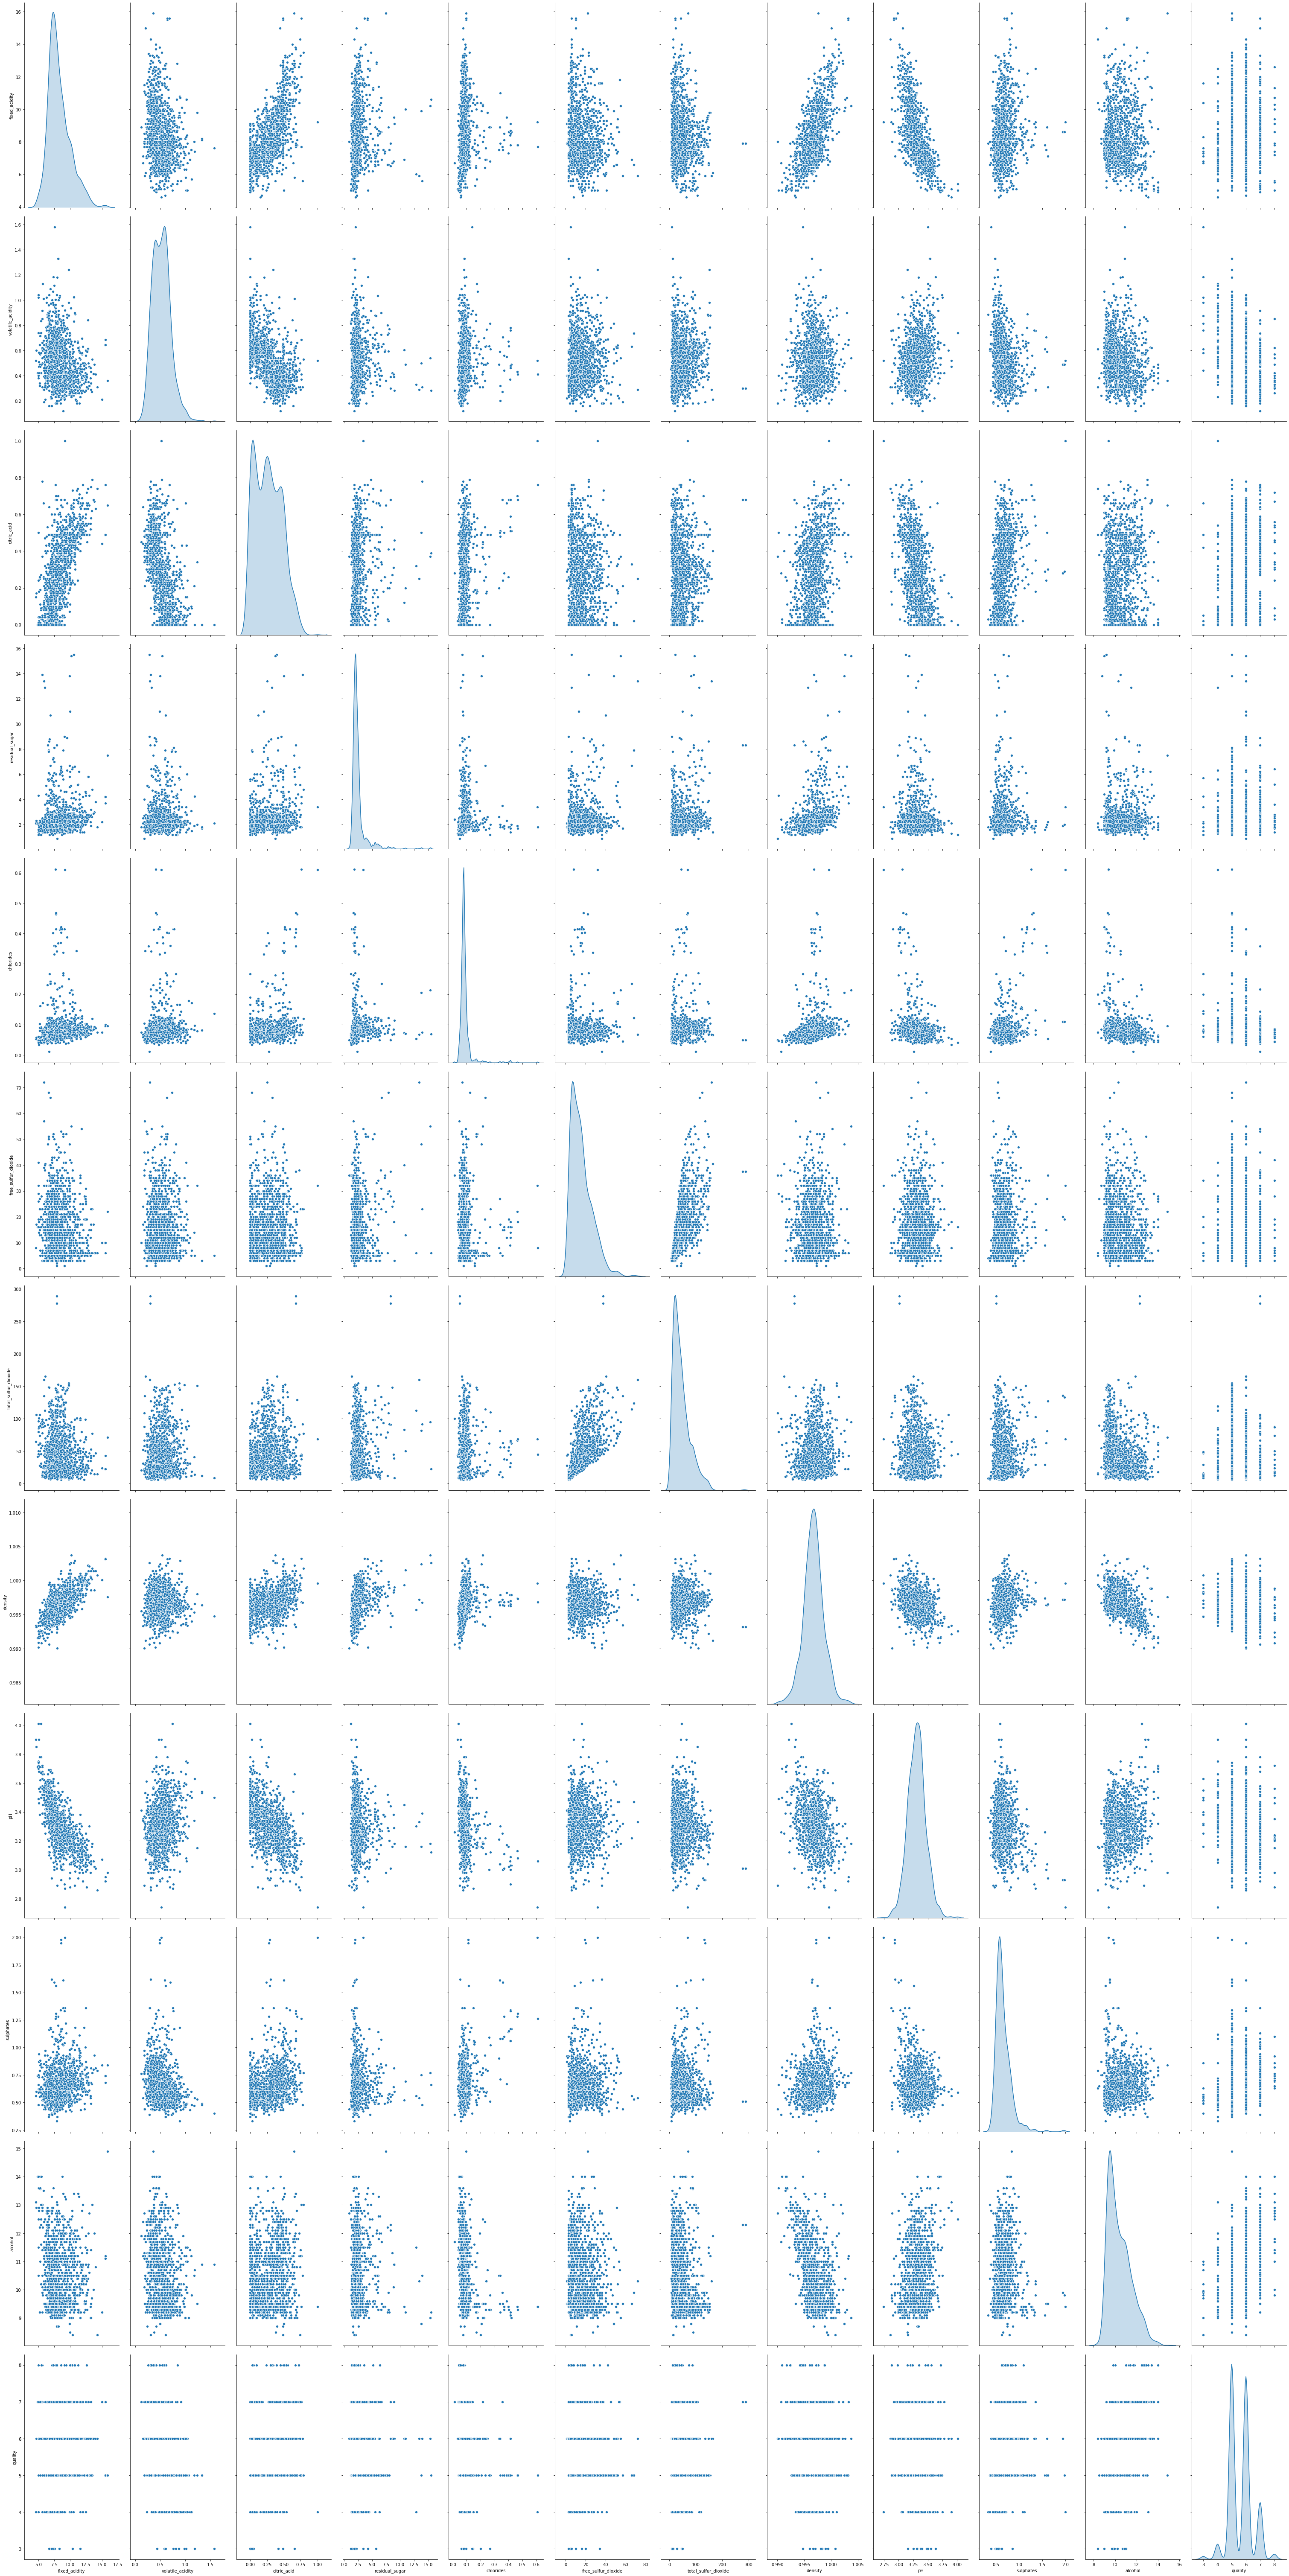

In [14]:
#importing seaborn for statistical plots
import seaborn as sns

sns.pairplot(wine_data, size=7,aspect=0.5 , diag_kind='kde');

When data is elongated the Euledian distance may not be appropriate method. Diagnols provides you the idea of how many clutsers could be possible. Which distance method should be used for clustering.

In [15]:
from sklearn.cluster import AgglomerativeClustering 

In [16]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [17]:
model.fit(wine_data_attr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [19]:
wine_data_attr['labels'] = model.labels_

wine_data_attr.groupby(["labels"]).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,,
0,65,65,65,65,65,65,65,65,65,65,65,65
1,2,2,2,2,2,2,2,2,2,2,2,2
2,589,589,589,589,589,589,589,589,589,589,589,589
3,2,2,2,2,2,2,2,2,2,2,2,2
4,185,185,185,185,185,185,185,185,185,185,185,185
5,756,756,756,756,756,756,756,756,756,756,756,756


In [20]:
wine_clusters = wine_data_attr.groupby(['labels'])
wine_clusters

In [21]:
print(wine_clusters)

In [22]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object

In [23]:
wine_groups

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,labels
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [26]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [27]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [28]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'average')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.8333815767944764

In [29]:
coph_dists

array([35.07093532, 35.07093532, 35.07093532, ..., 10.48315196,
       10.89591089, 10.89591089])

In [30]:
Z

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [7.87000000e+02, 7.88000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.18000000e+02, 3.20000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.18900000e+03, 3.19300000e+03, 4.40631529e+01, 2.52000000e+02],
       [3.19200000e+03, 3.19400000e+03, 7.33880520e+01, 1.59700000e+03],
       [3.15400000e+03, 3.19500000e+03, 2.38598590e+02, 1.59900000e+03]])

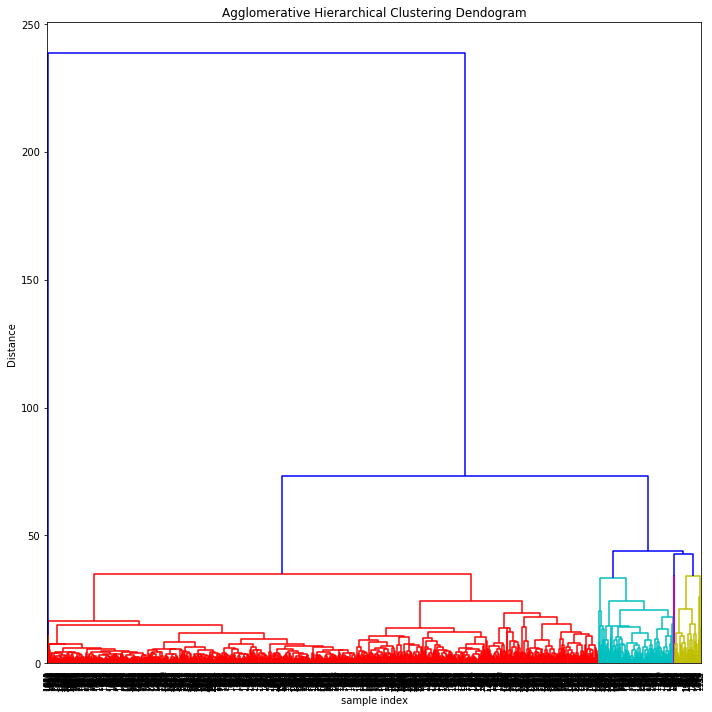

In [31]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'complete')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.8387870482249878

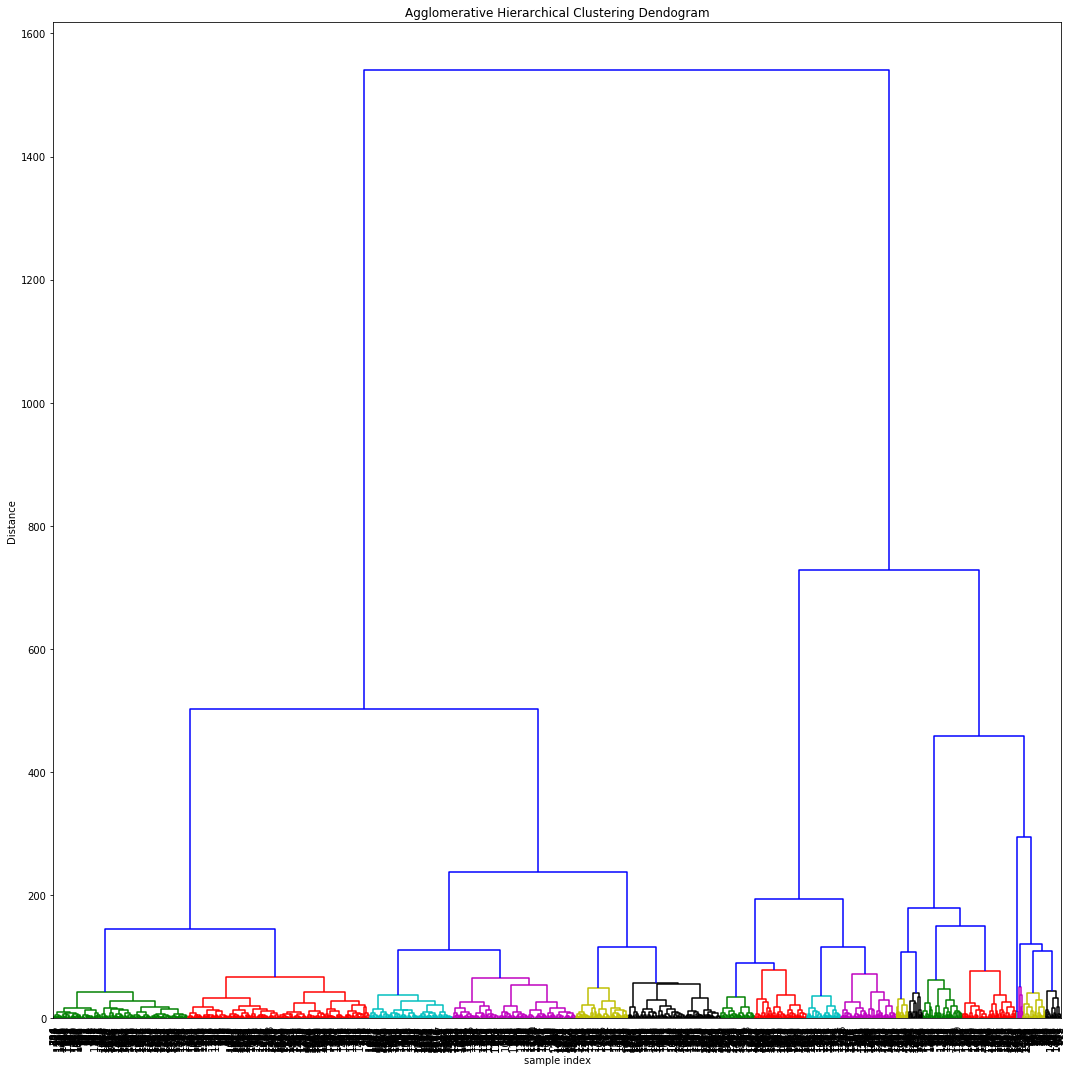

In [36]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [33]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'ward')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.6688164031714893

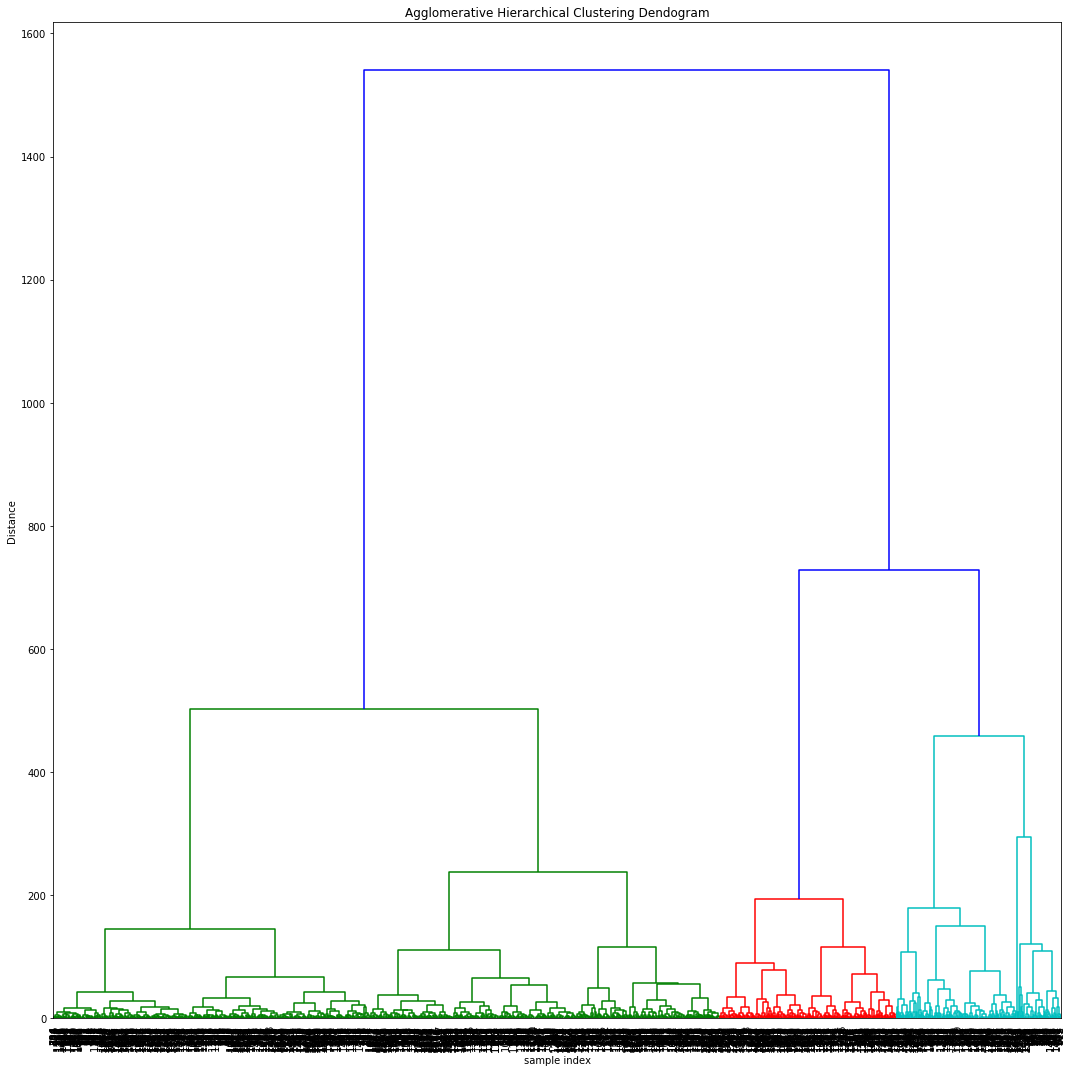

In [35]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()